In [1]:
from selenium import webdriver

In [2]:
browser = webdriver.Chrome('../webdriver/chromedriver.exe')
browser.get("http://movie.naver.com/movie/bi/mi/basic.nhn?code=156464")

In [3]:
xpath = '//*[@id="movieEndTabMenu"]/li[5]/a'
browser.find_element_by_xpath(xpath).click()

In [15]:
# from bs4 import BeautifulSoup

# html = browser.page_source
# soup = BeautifulSoup(html, 'html.parser')

# result = soup.select('#netizen_point_tab_inner > div > em')

# loop를 돌며 내용을 불러오기 => css_selector가 적합!!!

target = '#netizen_point_tab_inner > div > em'
result = browser.find_elements_by_css_selector(target)

result

[<selenium.webdriver.remote.webelement.WebElement (session="49534ec1278b79121fae73fc9ee105af", element="0350c5c2-b87f-46b6-91c5-26af6dc6f8ec")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49534ec1278b79121fae73fc9ee105af", element="4f8227fc-863c-4279-ba80-655fa67f9147")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49534ec1278b79121fae73fc9ee105af", element="5d724c89-f528-4d29-aa3e-f808c96dab94")>,
 <selenium.webdriver.remote.webelement.WebElement (session="49534ec1278b79121fae73fc9ee105af", element="826b0080-1931-4c3f-bb18-755a9d99f0af")>]

In [16]:
for i in result:
    print(i.text, end='')

9.42

In [17]:
xpath = '//*[@id="movieEndTabMenu"]/li[6]/a'
browser.find_element_by_xpath(xpath).click()

In [23]:
#reviewTab > div > div > ul > li:nth-child(1) > p > a

target2 = '#reviewTab > div > div > ul > li > p > a'
result2 = browser.find_elements_by_css_selector(target2)

len(result2)

10

In [26]:
for i in result2:
    print(i.text)

영화 보헤미안 랩소디를 아이맥스 스크린을 통해 관람했다. 실제 콘서트 현장에 있는 듯한 기분이 들 정도로 생생한 분위기와 현장감을 담은 공연 장면의 열기가 아이맥스 스크린을 통해서 더욱 극대화되는 느낌이 들었다.음악의 꿈을 ...
이 영화 - 퀸 = 0퀸이 아니었다면 볼 리도 없었겠지만 퀸이라 봤다. 퀸이니까. 게다가 나름 네임류 감독이기에 평타만 치자. 평타만 치자 바랐다.이 영화(보헤미안 랩소디) - 퀸 = 0이었다.이 영화의 포커스는 무엇인가.퀸이라는 그룹에 ...
이 영화를 보기 전, 기대치를 최대한 낮추었다. "이 영화는 분명히 형편없을 거야!"라는 혼잣말을 갈릴레오 갈릴레오처럼 수도 없이 되뇌었다. 사실 영화의 퀄리티가 진짜 객관적으로 형편없을 거라는 예상은 아니었다. 오히려 브라이...
영화 보헤미안 랩소디 후기, 프레디모큐리와 퀸에 관련한 실화.. 퀸을 좋아하시는 분들이라면 열광적으로 좋아할만한 영화입니다. ☆ 프롤로그 완벽한 타인을 보고 포스팅 했는데 이랬다 저랬다 하는 분들이 너무 많으신데요.지극...
프레디 삼촌. 절대 저 모습이 아니었어.85년 Live Aid공연 모습인듯 한데 난닝구와 청바지 삼선 아디다스 운동화 차림에 오른팔 상박 팔찌는제대로 흉내내었지만 너무 달라. 너무 빈해 보여...........초등학교 입학때부터 대학졸업까지...
안녕하세요. 케이론입니다!오늘 리뷰할 영화는보헤미안 랩소디입니다.지극히 개인적인 몇 줄 평피곤한 몸을 이끌고상영 시간이 가까운 영화를 택했다.그 어떤 줄거리나 정보도 없이 예매한 영화가<보헤미안 랩소디>란 사실에 감사...
프레디머큐리를 낮게 평가한 저질 상업 영화다.음악에 대한 열정과 완벽한 음악을 만들기 위한 노력을 제대로 표현하지 않았으며, 최고의 라이브를 위해, 관객과 호응하기 위해 어떤 노력을 했는지도 없다. 이란계 외국인으로서 받는 차...
queen bohemian rhapsody과연영화에서 이명곡을 어떻게 부를것인가 느낌은 결말부분에 나올꺼같은데 기대된다 하아 이런명곡부를가수가 있을까 기

In [27]:
result_list = []

for i in range(1, 11):
    print(i)
    
#     페이지 주소 접근 = '실제주소&page'+str(i)
    browser.get("https://movie.naver.com/movie/bi/mi/review.nhn?code=156464&page="+str(i))
    target2 = '#reviewTab > div > div > ul > li > p > a'
    result2 = browser.find_elements_by_css_selector(target2)

#     리뷰내용을 리스트에 추가
    for j in result2:
        result_list.append(j.text)

1
2
3
4
5
6
7
8
9
10


## 워드클라우드

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
text = ''.join(result_list)
text = text.replace('\\','')
text = text.replace('...','')
text = text.replace("\"", '')
text = text.replace('\"','')

In [30]:
result_str = str(result_list)

In [42]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [47]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(max_font_size=300,
                     font_path='C:\Windows\Fonts\malgunbd.ttf',
                     stopwords=STOPWORDS,
                     background_color='#FFFFFF',
                     width=600, height=600).generate(result_str)

In [48]:
wordcloud.words_

{'보헤미안 랩소디': 1.0,
 '브라이언 싱어': 0.4716981132075472,
 '랩소디 감독': 0.4528301886792453,
 '감독 브라이언': 0.4528301886792453,
 '싱어 출연': 0.4528301886792453,
 '출연 라미': 0.4528301886792453,
 '라미 말렉': 0.4528301886792453,
 '조셉 마젤로': 0.4528301886792453,
 '루시 보인턴': 0.4528301886792453,
 '개봉 미국': 0.39622641509433965,
 '미국 영국': 0.39622641509433965,
 '퀸의': 0.37735849056603776,
 '영화': 0.3584905660377358,
 '영화를': 0.32075471698113206,
 '영국 평점': 0.2641509433962264,
 '영화 보헤미안': 0.24528301886792453,
 '말렉 조셉': 0.24528301886792453,
 '평점 리뷰보기': 0.24528301886792453,
 '마젤로 마이크': 0.22641509433962265,
 '마이크 마이어스': 0.22641509433962265,
 '마이어스 루시': 0.22641509433962265,
 '말렉 루시': 0.22641509433962265,
 '보인턴 귈림': 0.22641509433962265,
 '귈림 하디': 0.22641509433962265,
 '하디 조셉': 0.22641509433962265,
 '퀸을': 0.20754716981132076,
 '마젤로 개봉': 0.20754716981132076,
 '너무': 0.18867924528301888,
 '프레디': 0.18867924528301888,
 '보인턴 개봉': 0.18867924528301888,
 '영화의': 0.16981132075471697,
 '사실': 0.16981132075471697,
 '보고': 0.16981132075471697,
 'Q

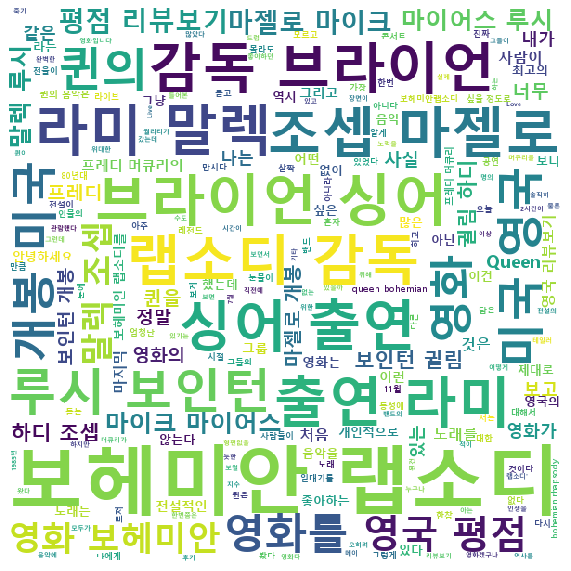

In [49]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)

plt.tight_layout(pad=0)
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

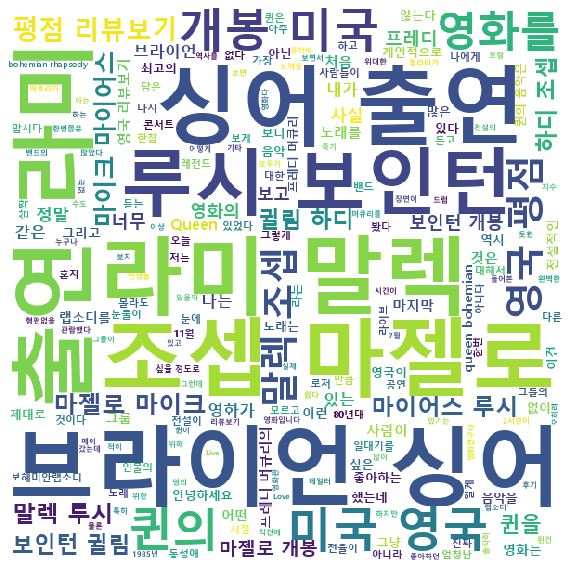

In [54]:
# 필요없는 단어 제거

stopwords = set(STOPWORDS)
stopwords.add("보헤미안")
stopwords.add("랩소디")
stopwords.add("영화")
stopwords.add("감독")

wordcloud = WordCloud(max_font_size=300,
                     font_path='C:\Windows\Fonts\malgunbd.ttf',
                     stopwords=stopwords,
                     background_color='#FFFFFF',
                     width=600, height=600).generate(result_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')

In [55]:
browser.close()

### 색상 바꾸기

In [56]:
import numpy as np

In [57]:
# change the value in return to set
# the singl color need, in hsl format.
# hsl(hue 색조, saturation 채도, lightness 밝기)

def grey_color_func(word, font_size, position, orientation,
                   random_state=None, **kwargs):
    return("hsl(1, 100%%, %d%%)"%np.random.randint(1,99))


wordcloud = WordCloud(max_font_size=300,
                     font_path='C:\Windows\Fonts\malgunbd.ttf',
                     stopwords=stopwords,
                     background_color='#FFFFFF',
                     width=600, height=600,
                     random_state=1).generate(result_str)

(-0.5, 599.5, 599.5, -0.5)

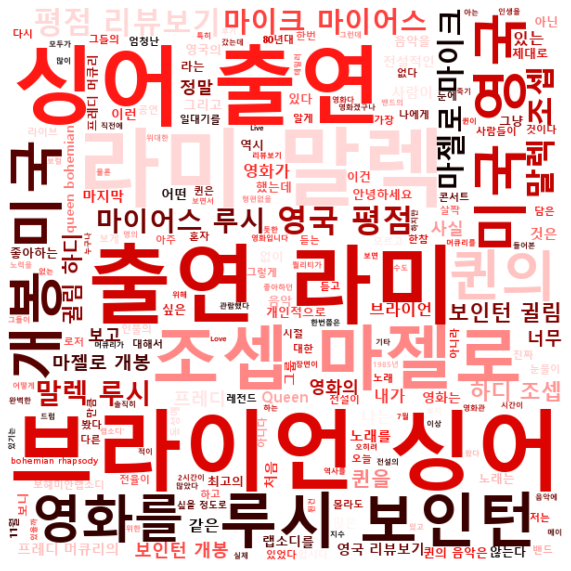

In [58]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func = grey_color_func,
                            random_state=3),
          interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off')